In [2]:
# import the necessary packages
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d,ConvexHull,Delaunay
import cv2
import matplotlib.pyplot as plt
from collections import Counter,OrderedDict
#from rdfpy import rdf
%matplotlib notebook

In [3]:
cam = cv2.VideoCapture("E:\C0105.mp4")
currentframe = 0
i=0
frame_skip=120
hs=[]
while(currentframe<500):
#while True:     
    # reading from frame
    ret,frame = cam.read()
    if ret:
        # if video is still left continue creating images
        # writing the extracted images
        #cv2.imwrite(name, frame)       
        y=200
        x=0
        w=1750
        h=750
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        crop_img = gray[y:y+h, x:x+w]
        blur = cv2.GaussianBlur(crop_img, (3, 3), 4)
        im_floodfill=crop_img.copy()
        th = cv2.adaptiveThreshold(im_floodfill,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,21,10)
        h, w = crop_img.shape[:2]
        mask = np.zeros((h+2, w+2), np.uint8)
        circles = cv2.HoughCircles(crop_img, cv2.HOUGH_GRADIENT, 0.001, 10,param1=120 ,param2=6 ,minRadius=5 ,maxRadius=7)
        circles=circles[0, :]
        for (x,y,r) in circles:
            cv2.floodFill(th, mask, (int(x),int(y)), 255)
        cv2.imshow('Frame', th)
        k = cv2.waitKey(1)
        if k == 113: # 113 is ASCII code for q key
                break
        currentframe += 1
cam.release()
cv2.destroyAllWindows()

In [19]:
import cv2,skimage
cam = cv2.VideoCapture("E:\Avalanche\C0119.mp4")
currentframe=0
initialtime=10
length=2
data=[]
rs=[]
while(currentframe<initialtime*120+length*120):    
    ret,frame = cam.read()
    if currentframe<initialtime*120:
        currentframe += 1
        continue
    elif ret: #and ((currentframe-initialtime*60)%10==0):
        #fig=plt.figure(dpi=150)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        crop_img = gray#[660:850, 120:300]
        blur = cv2.GaussianBlur(crop_img, (3, 3), 4)
        im_floodfill=crop_img.copy()
        th = cv2.adaptiveThreshold(im_floodfill,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,41,0)
        h, w = crop_img.shape[:2]
        mask = np.zeros((h+2, w+2), np.uint8)
        circles = cv2.HoughCircles(crop_img, cv2.HOUGH_GRADIENT, 0.01, 18,param1=80 ,param2=7 ,minRadius=10 ,maxRadius=11)
        circles=circles[0, :]
        for (x,y,r) in circles:
            crop_img=cv2.circle(crop_img,(int(x),int(y)) , int(r), (0,0,255), 1)
            cv2.floodFill(th, mask, (int(x),int(y)), 255)
        cv2.imshow('Frame', crop_img)
        rs=rs+list(circles[:,2])
        k = cv2.waitKey(10)
        if k == 113: # 113 is ASCII code for q key
                break
        currentframe += 1
cam.release()
cv2.destroyAllWindows()

<IPython.core.display.Javascript object>


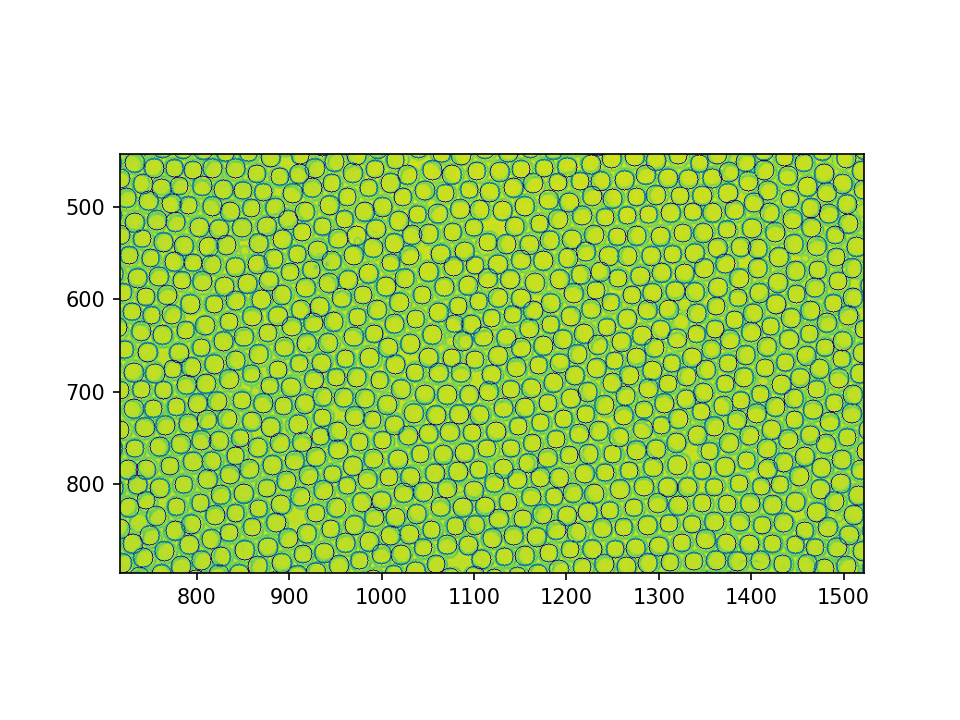

In [18]:
fig=plt.figure(dpi= 150, facecolor='w', edgecolor='k')
th = cv2.adaptiveThreshold(im_floodfill,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,41,0)
#circles = cv2.HoughCircles(crop_img, cv2.HOUGH_GRADIENT, 0.001, 10,param1=120 ,param2=6 ,minRadius=5 ,maxRadius=7)
#circles=circles[0, :]
plt.imshow(crop_img)
ax=fig.gca()
#for (x,y,r) in circles:
    #cc = plt.Circle(( x , y ), r ,fill=False,color='r',lw=0.5)
    #ax.add_artist( cc )
plt.show()

<IPython.core.display.Javascript object>


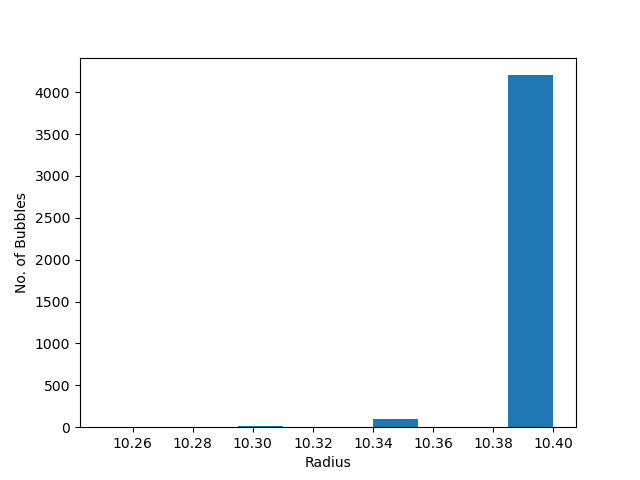

Text(0, 0.5, 'No. of Bubbles')

In [21]:
plt.figure()
plt.hist(circles[:,2])
plt.xlabel('Radius')
plt.ylabel('No. of Bubbles')

<IPython.core.display.Javascript object>


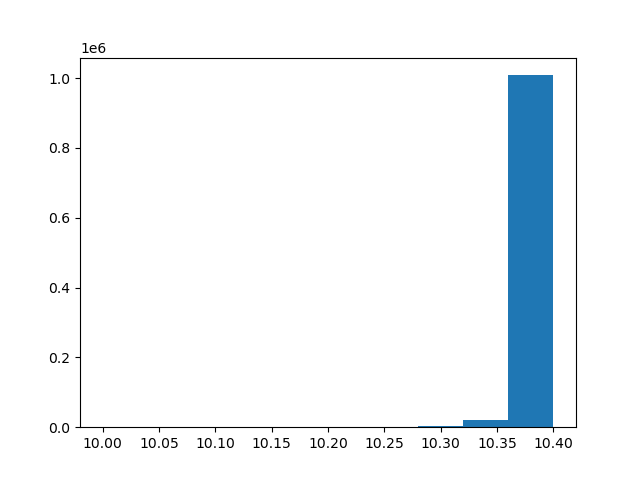

(array([2.100000e+01, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.560000e+02, 5.920000e+02, 2.675000e+03,
        2.136900e+04, 1.008574e+06]),
 array([10.        , 10.03999996, 10.07999992, 10.11999989, 10.15999985,
        10.19999981, 10.23999977, 10.27999973, 10.31999969, 10.35999966,
        10.39999962]),
 <BarContainer object of 10 artists>)

In [15]:
plt.figure()
plt.hist(rs)

In [26]:
#Canny edge detection
max_lowThreshold = 300
window_name = 'Edge Map'
title_trackbar = 'Min Threshold:'
ratio = 2
kernel_size = 3
def CannyThreshold(val):
    low_threshold = val
    #img_blur = cv2.blur(src_gray, (3,3))
    detected_edges = cv2.Canny(src_gray, low_threshold, low_threshold*ratio, kernel_size)
    mask = detected_edges != 0
    dst = src * (mask.astype(src.dtype))
    cv2.imshow(window_name, dst)

src=crop_img
src_gray = crop_img
cv2.namedWindow(window_name)
cv2.createTrackbar(title_trackbar, window_name , 0, max_lowThreshold, CannyThreshold)
CannyThreshold(0)
cv2.waitKey()
cv2.destroyAllWindows()

In [72]:
import skimage
from skimage.util import img_as_float
image = img_as_float(th)
label_image, number_of_labels = skimage.measure.label(image, background=255, return_num=True)
print("Found %d features"%(number_of_labels))
regions=skimage.measure.regionprops(label_image)

Found 713 features


<IPython.core.display.Javascript object>


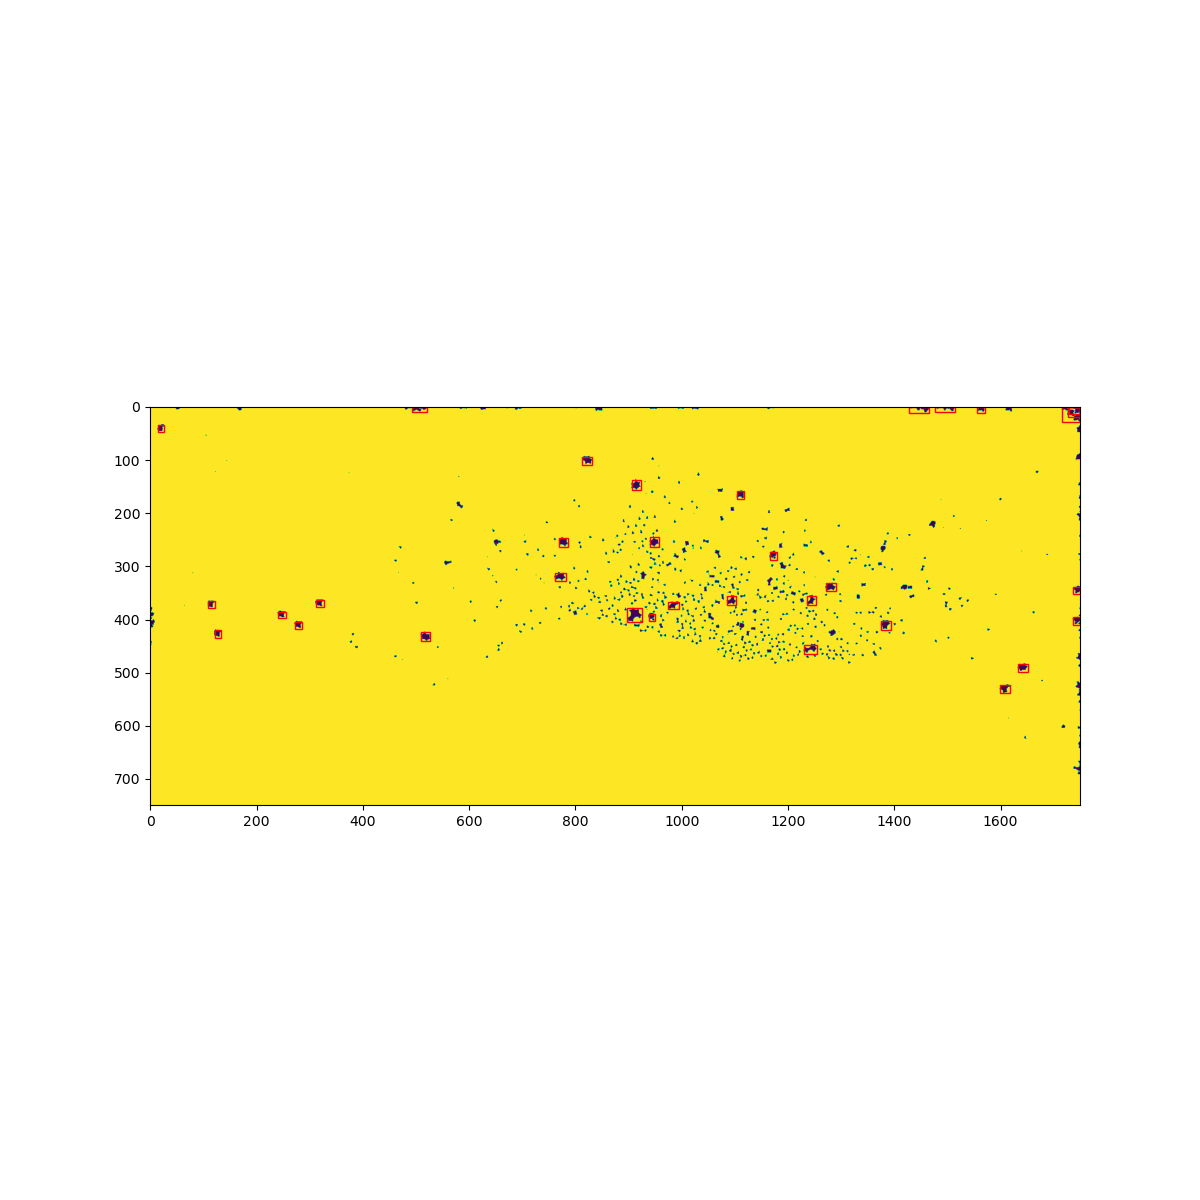

In [79]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 12))
ax.imshow(image)
for region in regions:
    if region.area < 100 or region.area > 1000:
        continue
    # Only black areas
    #if region.mean_intensity > 1:
        #continue
    # On the top, skip small area with a second threshold
    #if region.centroid[0] < 260 and region.area < 80:
        #continue
    # Draw rectangle which survived to the criterions
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=1)
    ax.add_patch(rect)

In [74]:
areas=[]
for prop in regions:
    areas.append(prop.area)

<IPython.core.display.Javascript object>


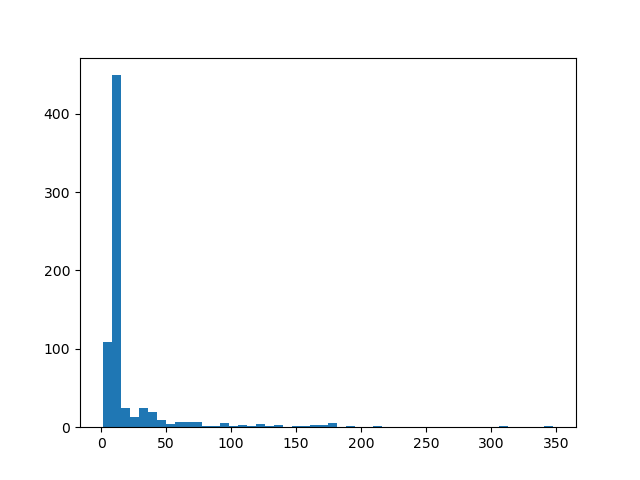

(array([109., 449.,  25.,  13.,  24.,  19.,   9.,   4.,   6.,   6.,   6.,
          2.,   2.,   5.,   2.,   3.,   2.,   4.,   1.,   3.,   0.,   2.,
          1.,   3.,   3.,   5.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.  ,   7.94,  14.88,  21.82,  28.76,  35.7 ,  42.64,  49.58,
         56.52,  63.46,  70.4 ,  77.34,  84.28,  91.22,  98.16, 105.1 ,
        112.04, 118.98, 125.92, 132.86, 139.8 , 146.74, 153.68, 160.62,
        167.56, 174.5 , 181.44, 188.38, 195.32, 202.26, 209.2 , 216.14,
        223.08, 230.02, 236.96, 243.9 , 250.84, 257.78, 264.72, 271.66,
        278.6 , 285.54, 292.48, 299.42, 306.36, 313.3 , 320.24, 327.18,
        334.12, 341.06, 348.  ]),
 <BarContainer object of 50 artists>)

In [77]:
plt.figure()
plt.hist(areas[1:],bins=50)

In [7]:
cam = cv2.VideoCapture("202303291603.mp4")
   
currentframe = 0
i=0
frame_skip=0
hs=[]
while(currentframe<480):
#while True:
    # reading from frame
    ret,frame = cam.read()
    if ret:
        # if video is still left continue creating images
        # writing the extracted images
        #cv2.imwrite(name, frame)       
        
        if i > frame_skip - 1:
            #name = './data/frame' + str(currentframe) + '.png'
            #print(name)
            y=250
            x=1721
            w=1100
            h=1500
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            crop_img = gray[y:y+h, x:x+w]
            blur = cv2.GaussianBlur(crop_img, (3, 3), 4)
            im_floodfill=crop_img.copy()
            th = cv2.adaptiveThreshold(im_floodfill,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,21,10)
            h, w = crop_img.shape[:2]
            mask = np.zeros((h+2, w+2), np.uint8)
            circles = cv2.HoughCircles(crop_img, cv2.HOUGH_GRADIENT, 0.001, 10,param1=120 ,param2=6 ,minRadius=5 ,maxRadius=7)
            circles=circles[0, :]
            for (x,y,r) in circles:
                cv2.floodFill(th, mask, (int(x),int(y)), 255)
            cv2.imshow('Frame', th)
            k = cv2.waitKey(1)
            if k == 113: # 113 is ASCII code for q key
                break
            i = 0
            currentframe += 1
            continue
        i += 1
    else:
        break
cam.release()
cv2.destroyAllWindows()

<IPython.core.display.Javascript object>


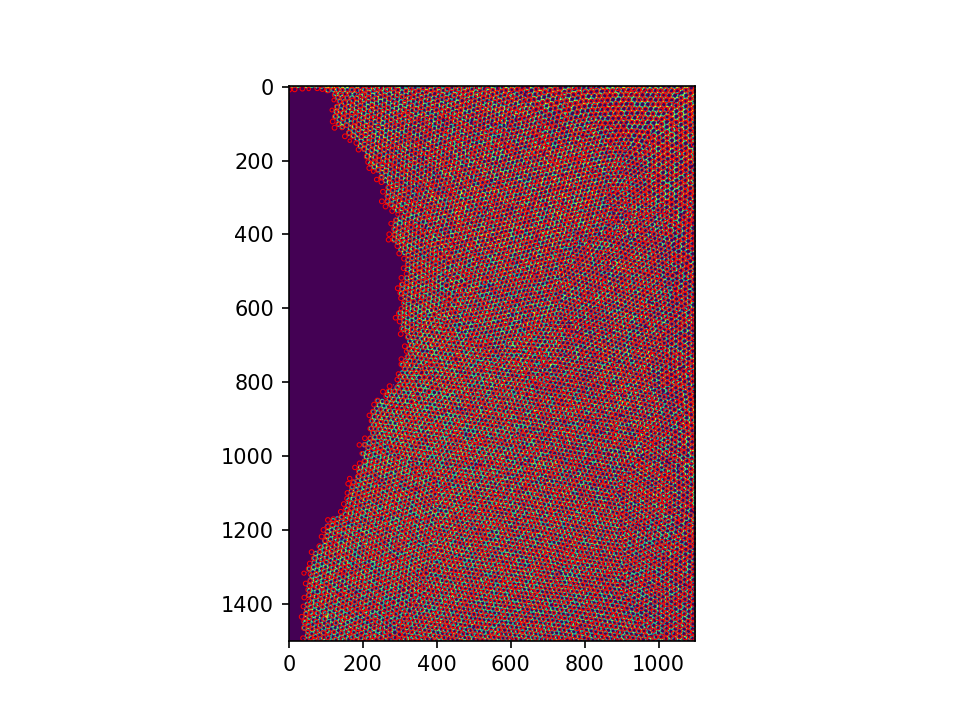

In [31]:
fig=plt.figure(dpi= 150, facecolor='w', edgecolor='k')
th = cv2.adaptiveThreshold(im_floodfill,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,41,5)
circles = cv2.HoughCircles(th, cv2.HOUGH_GRADIENT, 0.001, 14,param1=60 ,param2=0.01 ,minRadius=4 ,maxRadius=7)
circles=circles[0, :]
plt.imshow(th)
ax=fig.gca()
for (x,y,r) in circles:
    cc = plt.Circle(( x , y ), r ,fill=False,color='r',lw=0.5)
    ax.add_artist( cc )
plt.show()